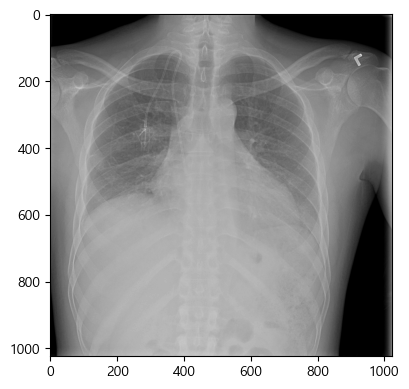

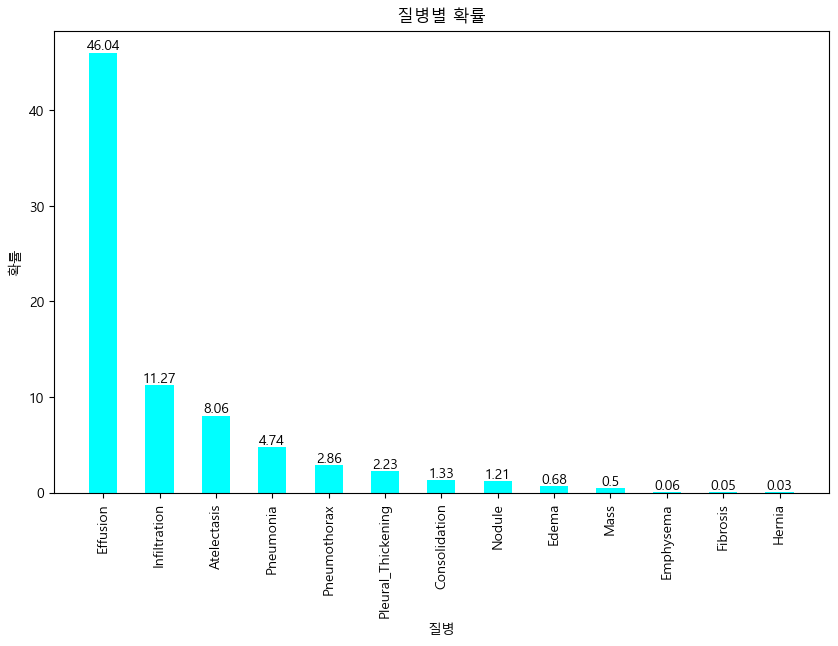

In [1]:
import os
from pyexpat import model

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

from univdt.components.nih import NIH
from functools import partial
import torchxrayvision as xrv
from xrcv import generate_random_index, resize_image, normalize_image, process_image, plot_image
from matplt import visualize_results 

# 무작위 인덱스 생성
root_dir = 'C:\\nih\\nih'  # TODO: 루트 디렉토리 설정
random_index = generate_random_index(25596)

# 이미지와 라벨 로드
nih = partial(NIH, root_dir=root_dir, transform=None)
nih_test = nih(split='test')
data = nih_test.load_data(random_index)
image = data['image']
label = data['label']

# 이미지 전처리
image_resized = resize_image(image)
image_resized = normalize_image(image_resized)

# 이미지 처리
outputs = process_image(image_resized)

# 이미지 출력
plot_image(image, label, outputs)

# 모델 객체 생성
model = xrv.models.ResNet(weights="resnet50-res512-all")  # 유효한 모델 객체로 대체해야 함

# 결과 시각화
result_table = visualize_results(outputs, model)